In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode

In [53]:
test = pd.read_csv('presentForUH.csv',parse_dates=['date'], index_col=0)
test

,date,time,amount
0,2021-01-01,1,0.0
1,2021-01-01,2,0.0
2,2021-01-01,3,0.0
3,2021-01-01,4,0.0
4,2021-01-01,5,0.0
...,...,...,...
8707,2021-12-31,20,0.0
8708,2021-12-31,21,0.0
8709,2021-12-31,22,0.0
8710,2021-12-31,23,0.0


In [4]:
test.set_index('date',inplace=True)
test

,time,amount
date,,
2021-01-01,1,0.0
2021-01-01,2,0.0
2021-01-01,3,0.0
2021-01-01,4,0.0
2021-01-01,5,0.0
...,...,...
2021-12-31,20,0.0
2021-12-31,21,0.0
2021-12-31,22,0.0


In [5]:
test

,time,amount
date,,
2021-01-01,1,0.0
2021-01-01,2,0.0
2021-01-01,3,0.0
2021-01-01,4,0.0
2021-01-01,5,0.0
...,...,...
2021-12-31,20,0.0
2021-12-31,21,0.0
2021-12-31,22,0.0


In [6]:
test['month']=test.index.month
test['day']=test.index.day

test

,time,amount,month,day
date,,,,
2021-01-01,1,0.0,1,1
2021-01-01,2,0.0,1,1
2021-01-01,3,0.0,1,1
2021-01-01,4,0.0,1,1
2021-01-01,5,0.0,1,1
...,...,...,...,...
2021-12-31,20,0.0,12,31
2021-12-31,21,0.0,12,31
2021-12-31,22,0.0,12,31


# 평균 

In [268]:
meaning = test.groupby(['month'])['amount'].mean()
meaning

month
1     195.180726
2     293.191057
3     356.617083
4     394.773500
5     386.117944
6     404.912024
7     336.549489
8     313.870161
9     262.439208
10    323.282567
11    253.687986
12    208.275067
Name: amount, dtype: float64

In [84]:
label = ['1','2','3','4','5','6','7','8','9','10','11','12']
index = np.arange(len(label))

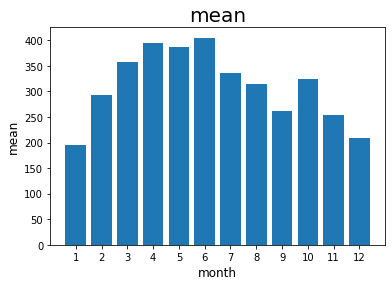

In [232]:
plt.bar(index, meaning)
plt.xticks(index, label)
plt.title('mean', fontsize=20)
plt.xlabel('month', fontsize=12)
plt.ylabel('mean', fontsize=12)
plt.show()

# 중앙값

In [271]:
medians = test.groupby(['month'])['amount'].median()
medians

month
1       0.000
2       0.000
3       7.445
4      46.345
5      84.685
6     118.670
7      62.780
8      39.025
9      13.535
10      1.080
11      0.000
12      0.000
Name: amount, dtype: float64

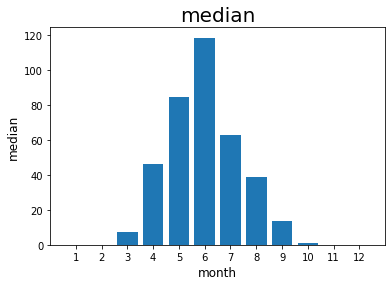

In [234]:
plt.bar(index, medians)
plt.xticks(index, label)
plt.title('median', fontsize=20)
plt.xlabel('month', fontsize=12)
plt.ylabel('median', fontsize=12)
plt.show()

# 최빈값

In [100]:
test = pd.read_csv('presentForUH.csv',parse_dates=['date'], index_col=0)
test

,date,time,amount
0,2021-01-01,1,0.0
1,2021-01-01,2,0.0
2,2021-01-01,3,0.0
3,2021-01-01,4,0.0
4,2021-01-01,5,0.0
...,...,...,...
8707,2021-12-31,20,0.0
8708,2021-12-31,21,0.0
8709,2021-12-31,22,0.0
8710,2021-12-31,23,0.0


In [101]:
del_idx = test[test['amount']==0].index
print(del_idx)

Int64Index([   0,    1,    2,    3,    4,    5,    6,   18,   19,   20,
            ...
            8691, 8692, 8693, 8694, 8706, 8707, 8708, 8709, 8710, 8711],
           dtype='int64', length=3945)


In [102]:
dels = test.drop(del_idx)
dels

,date,time,amount
7,2021-01-01,8,0.23
8,2021-01-01,9,26.39
9,2021-01-01,10,202.86
10,2021-01-01,11,645.76
11,2021-01-01,12,1126.75
...,...,...,...
8701,2021-12-31,14,467.04
8702,2021-12-31,15,282.10
8703,2021-12-31,16,174.49
8704,2021-12-31,17,58.60


In [103]:
bins = [0,300,500,700,900,1200,1900]
labels = [1,2,3,4,5,6]
dels['cut'] = pd.cut(dels['amount'],bins, right=False, labels=labels)
dels

,date,time,amount,cut
7,2021-01-01,8,0.23,1
8,2021-01-01,9,26.39,1
9,2021-01-01,10,202.86,1
10,2021-01-01,11,645.76,3
11,2021-01-01,12,1126.75,5
...,...,...,...,...
8701,2021-12-31,14,467.04,2
8702,2021-12-31,15,282.10,1
8703,2021-12-31,16,174.49,1
8704,2021-12-31,17,58.60,1


In [104]:
cutting = dels['cut'].value_counts()
cutting

1    2047
6     798
5     552
2     545
3     427
4     398
Name: cut, dtype: int64

In [105]:
dels['amount'].max()

1855.27

In [106]:
label = ['0~299','300~499','500~699','700~899','900~1199','1200~1899']
index = np.arange(len(label))

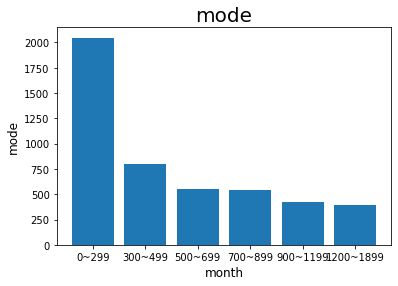

In [107]:
plt.bar(index, cutting)
plt.xticks(index, label)
plt.title('mode', fontsize=20)
plt.xlabel('month', fontsize=12)
plt.ylabel('mode', fontsize=12)
plt.show()

# 분산

In [108]:
test.set_index('date',inplace=True)
test

,time,amount
date,,
2021-01-01,1,0.0
2021-01-01,2,0.0
2021-01-01,3,0.0
2021-01-01,4,0.0
2021-01-01,5,0.0
...,...,...
2021-12-31,20,0.0
2021-12-31,21,0.0
2021-12-31,22,0.0


In [109]:
test['month']=test.index.month
test['day']=test.index.day

test

,time,amount,month,day
date,,,,
2021-01-01,1,0.0,1,1
2021-01-01,2,0.0,1,1
2021-01-01,3,0.0,1,1
2021-01-01,4,0.0,1,1
2021-01-01,5,0.0,1,1
...,...,...,...,...
2021-12-31,20,0.0,12,31
2021-12-31,21,0.0,12,31
2021-12-31,22,0.0,12,31


In [110]:
vars = test.groupby(['month'])['amount'].var()

In [111]:
label = ['1','2','3','4','5','6','7','8','9','10','11','12']
index = np.arange(len(label))

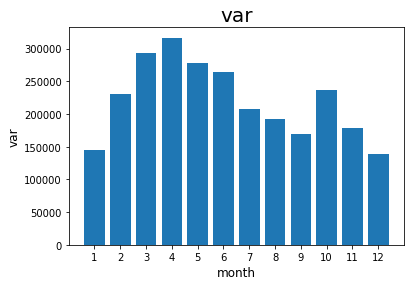

In [112]:
plt.bar(index, vars)
plt.xticks(index, label)
plt.title('var', fontsize=20)
plt.xlabel('month', fontsize=12)
plt.ylabel('var', fontsize=12)
plt.show()

# 표준편차

In [113]:
stds = test.groupby(['month'])['amount'].std()

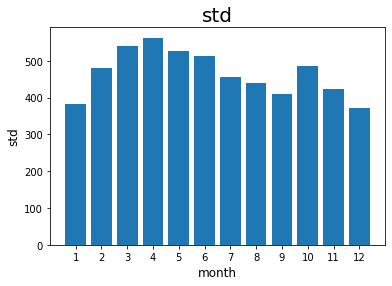

In [114]:
plt.bar(index, stds)
plt.xticks(index, label)
plt.title('std', fontsize=20)
plt.xlabel('month', fontsize=12)
plt.ylabel('std', fontsize=12)
plt.show()